## 임포트

## (PJT 1)당뇨병 수치를 맞춰보자

In [101]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

### (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [49]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes=load_diabetes()

# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_x=diabetes.data
df_y=diabetes.target

In [50]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


### (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [51]:
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_x = np.array(df_x)

### (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [52]:
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [53]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)


###  (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [54]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수를 구현해주세요.
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [55]:
# 손실함수를 MSE 함수로 정의해주세요.
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [56]:
# 기울기를 계산하는 gradient 함수를 구현해주세요.
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [65]:
# 학습률, learning rate 를 설정해주세요
LEARNING_RATE = 0.1

### (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [ ]:
losses = []
for i in range(1, 10001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

### (10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [82]:
# test 데이터에 대한 성능을 확인해주세요.
prediction = model(x_test, W, b)
mse = loss(x_test, W, b, y_test)
mse

2886.993064016794

### (11) 정답 데이터와 예측한 데이터 시각화하기

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

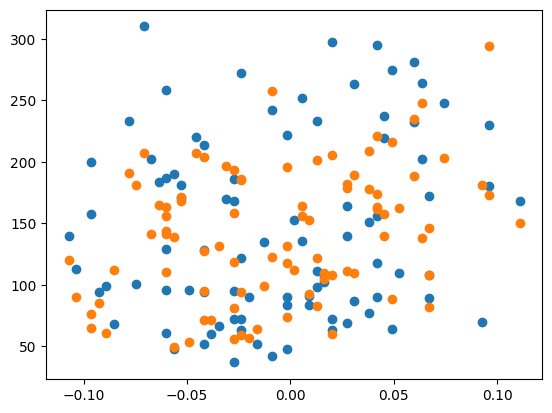

In [85]:
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()